In [ ]:
import gzip
# raindata = gzip.open("./12dec19-gzips/2019-10-17T17_30_16Z_rainbowagents_data.json.gz")
raindata = gzip.open("./12dec19-gzips/2019-09-03T02_44_46Z_rainbowagents_data.json.gz")
rd = raindata.read()
import json
hd = json.loads(rd)

In [ ]:
list(hd.values())[0]["timeUTC"] > '2019-08-16T02:57:00'

In [ ]:
aug23 = {}
for d in hd:
    if hd[d]["timeUTC"][:10] > "2019-08-23T08:00:00" and hd[d]["timeUTC"][:10] < "2019-08-24T08:00:00":
        aug23[d] = hd[d]

In [ ]:
json.dump(aug23, open("aug23.json", "w"))

In [ ]:
# len(list(hd.values()))
len(hd)

In [1]:
import lzma
import json
aug23 = json.loads((lzma.open('aug23.json.xz')).read())

In [2]:
len(aug23)

34046

In [ ]:
import pandas as pd
# alldf = pd.io.json.json_normalize(list(hd.values()))
alldf = pd.io.json.json_normalize(list(aug23.values()))
alldf["date"] = alldf["timeUTC"].str.slice(0,10)
len(alldf)

In [12]:
df = alldf
print(df[df["date"].str.match('2019-07-01') & df["siteName"].str.match('NYSCI')]["eventKey"].value_counts())
print(df["date"].unique())
print(df["eventKey"].unique())

Series([], Name: eventKey, dtype: int64)
['2019-08-24']
['PlantWatered' 'CreatureStateChanged' 'PlantStateChanged'
 'TreasureDespawned' 'TreasureSpawned' 'GameStart' 'CreatureUnlocked'
 'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
 'CardPlacedInMachine' 'CreatureSpawned' 'PlantPlanted'
 'CreatureDeselected' 'CreatureDespawned' 'LeafyOrbFilled'
 'CreatureLocked' 'MushroomOrbFilled' 'TreasureOpened'
 'SeedPacketCountChanged' 'FlagCancelled' 'WoodyOrbFilled' 'AllOrbsFilled'
 'CardPlacedInTray' 'CardSwapped' 'RainbowPlantPlanted']


In [10]:
alldf["player1CurrentScreen"].unique()

array(['StateMachineScreen_Creature3', nan, 'null', 'None', 'HubScreen',
       'FlagScreen', 'StateMachineScreen_Creature1',
       'StateMachineScreen_Creature0', 'StateMachineScreen_Creature2',
       'RainbowWaitScreen', 'RainbowScreen'], dtype=object)

In [11]:
# print(alldf[alldf["date"].str.match('2019-07-01') & alldf["siteName"].str.match('NYSCI')]["eventKey"].value_counts())
# print(alldf["date"].unique())
print(alldf["eventKey"].unique())
print(alldf["timeUTC"].max())
print(alldf["timeUTC"].min())
print(alldf["date"].unique())
print(alldf["siteName"].unique())

['PlantWatered' 'CreatureStateChanged' 'PlantStateChanged'
 'TreasureDespawned' 'TreasureSpawned' 'GameStart' 'CreatureUnlocked'
 'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
 'CardPlacedInMachine' 'CreatureSpawned' 'PlantPlanted'
 'CreatureDeselected' 'CreatureDespawned' 'LeafyOrbFilled'
 'CreatureLocked' 'MushroomOrbFilled' 'TreasureOpened'
 'SeedPacketCountChanged' 'FlagCancelled' 'WoodyOrbFilled' 'AllOrbsFilled'
 'CardPlacedInTray' 'CardSwapped' 'RainbowPlantPlanted']
2019-08-24T23:59:59
2019-08-24T00:00:06
['2019-08-24']
['Lawrence']


In [9]:
actionsdf = alldf[alldf["eventKey"].isin(["FlagMoved", "FlagPlaced", "CurrentScreenChanged", "CreatureSelected", "CardPlacedInTray", "FlagCancelled" "CardPlacedInMachine", "CardSwapped"])]

In [ ]:
len(actionsdf)

In [ ]:
for d in alldf["date"].unique():
    print(d, len(alldf[alldf["date"] == d]))

In [67]:
alldf[alldf["eventType"] == "GameConfiguration"]["eventKey"].unique()

array(['GameStart'], dtype=object)

In [7]:
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers


In [ ]:
p1Screens = px.scatter(x= actionsdf["timeUTC"], y = actionsdf["player1CurrentScreen"])
p2Screens = px.scatter(x= actionsdf["timeUTC"], y = actionsdf["player2CurrentScreen"])

In [13]:
p1Screens = go.Scatter(x= actionsdf["timeUTC"], y = actionsdf["player1CurrentScreen"], mode = "markers")
p2Screens = go.Scatter(x= actionsdf["timeUTC"], y = actionsdf["player2CurrentScreen"], mode = "markers")

In [ ]:
iplot([p1Screens, p2Screens])

In [ ]:
########Code to look for logs from specific event types############
for d in aug23:
    if aug23[d]["eventKey"] == "CardPlacedInMachine":
        break
aug23[d]

In [69]:
########Code to search for column names############
alldf.columns
for c in alldf.columns:
    if c[:16] == "player2Creature1":
        print(c)

In [77]:
# print(alldf["player2Creature3.trayCards.0"].unique())
# print(alldf["player2Creature3.trayCards.1"].unique())
# print(alldf["player2Creature3.trayCards.2"].unique())

print(alldf["player2Creature1.usedCards.0"].unique())

In [15]:
# print(alldf[""])
df = alldf

subdf = df[df["eventKey"].str.match("CurrentScreenChanged")]
stateChangedf = df[df["eventKey"] == "CreatureStateChanged"]
creatureSpawndf = df[df["eventKey"] == "CreatureSpawned"]
treasureOpendf = df[df["eventKey"] == "TreasureOpened"]
cardDf = df[df["eventKey"] == "CardPlacedInMachine"]
flagDf = df[df["eventKey"] == "FlagMoved"]

print(len(subdf))
print(len(stateChangedf))
print(len(treasureOpendf))
print(len(cardDf))
print(len(flagDf))


1518
6680
35
1562
9066


In [ ]:
timeGaps = df[df["eventKey"].str.match("FlagMoved") | df["eventKey"].str.match("CardPlacedInMachine")]["timeEpoch"].diff()
# binCount = 
ct = pd.cut(timeGaps, 300)
bins = timeGaps.groupby(ct).count()
bb = bins.tolist()

gaps = {"x": list(range(len(bb))), "y": bb}

# iplot([gaps], filename='time gaps histogram')
fig = go.Figure([gaps])
fig.show()

In [ ]:
bins

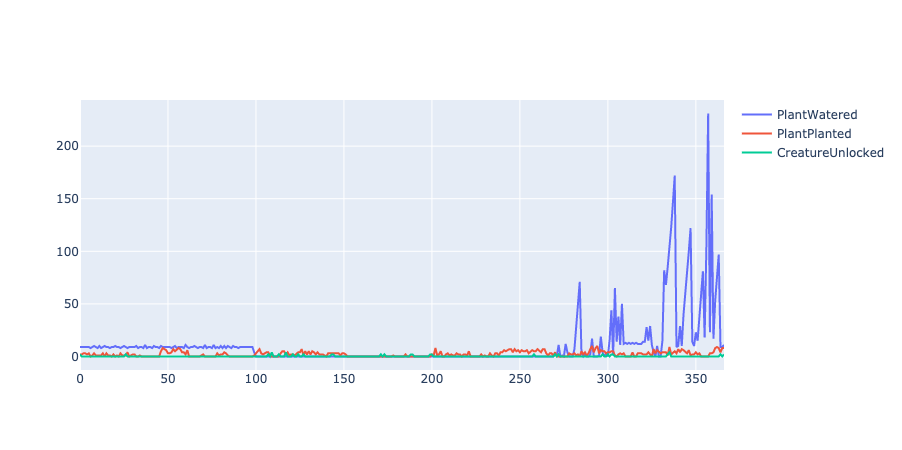

In [17]:
# subdf = alldf[alldf["eventKey"] == "CardPlacedInMachine"]
timeWindow = 60
binCount = (max(subdf["timeEpoch"]) - min(subdf["timeEpoch"])) / timeWindow

def makeBin(sdf, event = ""):
    if event != "":
        sdf = sdf[sdf["eventKey"] == event]
    ct = pd.cut(sdf["timeEpoch"], binCount)
    bins = sdf["timeEpoch"].groupby(ct).count()
    bb = bins.tolist()
    bAct = {"x": list(range(len(bb))), "y": bb, "name": event}
    return bAct

# ct = pd.cut(subdf["timeEpoch"], binCount)
# cardct = pd.cut(cardDf["timeEpoch"], binCount)

# df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()
# actionBins = subdf["timeEpoch"].groupby(ct).count()
# cardBins = cardDf["timeEpoch"].groupby(cardct).count()
# screenChange = makeBin(subdf)
# cardChange = makeBin(cardDf)
# treasureOpen = makeBin(treasureOpendf)
# plating

# PlantWatered, PlantPlanted, RainbowPlantPlanted, PlantStateChanged, CreatureUnlocked

# ['PlantWatered' 'CreatureStateChanged' 'PlantStateChanged'
#  'TreasureDespawned' 'TreasureSpawned' 'GameStart' 'CreatureUnlocked'
#  'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
#  'CardPlacedInMachine' 'CreatureSpawned' 'PlantPlanted'
#  'CreatureDeselected' 'CreatureDespawned' 'LeafyOrbFilled'
#  'CreatureLocked' 'MushroomOrbFilled' 'TreasureOpened'
#  'SeedPacketCountChanged' 'FlagCancelled' 'WoodyOrbFilled' 'AllOrbsFilled'
#  'CardPlacedInTray' 'CardSwapped' 'RainbowPlantPlanted']

# flagMove = makeBin(flagDf)

# cardmakeBin(subdf)

# screenChange = {"x": list(range(len(ab))), "y": ab}
# cardChange = {"x": list(range(len(cb))), "y": cb}

# data = [screenChange, stateChange]
# data = [screenChange, cardChange, treasureOpen, flagMove]
data = [makeBin(alldf, "PlantWatered"), makeBin(alldf, "PlantPlanted"), makeBin(alldf, "CreatureUnlocked")]


iplot(data, filename='normalized histogram')

In [ ]:
timeGaps = df[df["eventKey"].str.match("FlagMoved") | df["eventKey"].str.match("CardPlacedInMachine")]["timeEpoch"].diff()
# binCount = 
ct = pd.cut(timeGaps, 20000)
bins = timeGaps.groupby(ct).count()
bb = bins.tolist()

gaps = {"x": list(range(len(bb))), "y": bb}


iplot([gaps], filename='time gaps histogram')

In [ ]:
bins